# Pricing Strategy

In [1]:
#Importing necessary Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
#Loading the dataset

data = pd.read_csv("C:/Users/dell/Downloads/archive/DatafinitiElectronicsProductsPricingData(1).csv")

In [3]:
#Data description

data

,id,pricesAmountMax,pricesAmountMin,pricesAvailability,pricesCondition,pricesCurrency,pricesDateSeen,pricesIsSale,pricesMerchant,pricesShipping,...,name,primaryCategories,sourceURLs,upc,weight,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,AVphzgbJLJeJML43fA0o,104.99,104.99,Yes,New,USD,"2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...",False,Bestbuy.com,NaN,...,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,https://www.amazon.com/Sanus-VLF410B1-10-Inch-...,7.94E+11,32.8 pounds,NaN,NaN,NaN,NaN,NaN
1,AVpgMuGwLJeJML43KY_c,69.00,64.99,In Stock,New,USD,2017-12-14T06:00:00Z,True,Walmart.com,Expedited,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
2,AVpgMuGwLJeJML43KY_c,69.00,69.00,In Stock,New,USD,2017-09-08T05:00:00Z,False,Walmart.com,Expedited,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
3,AVpgMuGwLJeJML43KY_c,69.99,69.99,Yes,New,USD,2017-10-10T05:00:00Z,False,Bestbuy.com,NaN,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
4,AVpgMuGwLJeJML43KY_c,66.99,66.99,Yes,New,USD,2017-08-28T07:00:00Z,False,Bestbuy.com,NaN,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14587,AVpgibRDLJeJML43PTZX,65.99,65.99,NaN,NaN,USD,2015-09-05T00:00:00Z,True,NaN,USD 13.81 shipping,...,naxa - 2.1-Channel Soundbar with 50-Watt Digit...,Electronics,https://www.walmart.com/reviews/product/441840...,8.40E+11,4.1 pounds,NaN,NaN,NaN,NaN,NaN
14588,AVpgibRDLJeJML43PTZX,58.99,58.99,Yes,New,USD,"2017-10-10T19:00:00Z,2017-09-06T17:00:00Z,2017...",False,Bestbuy.com,NaN,...,naxa - 2.1-Channel Soundbar with 50-Watt Digit...,Electronics,https://www.walmart.com/reviews/product/441840...,8.40E+11,4.1 pounds,NaN,NaN,NaN,NaN,NaN
14589,AVpgibRDLJeJML43PTZX,58.49,58.49,In Stock,New,USD,2018-03-05T11:00:00Z,False,Walmart.com,Standard,...,naxa - 2.1-Channel Soundbar with 50-Watt Digit...,Electronics,https://www.walmart.com/reviews/product/441840...,8.40E+11,4.1 pounds,NaN,NaN,NaN,NaN,NaN
14590,AVpgibRDLJeJML43PTZX,77.98,77.98,NaN,NaN,USD,2016-03-22T00:00:00Z,True,NaN,NaN,...,naxa - 2.1-Channel Soundbar with 50-Watt Digit...,Electronics,https://www.walmart.com/reviews/product/441840...,8.40E+11,4.1 pounds,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14592 entries, 0 to 14591
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  14592 non-null  object 
 1   pricesAmountMax     14592 non-null  float64
 2   pricesAmountMin     14592 non-null  float64
 3   pricesAvailability  12667 non-null  object 
 4   pricesCondition     13189 non-null  object 
 5   pricesCurrency      14592 non-null  object 
 6   pricesDateSeen      14592 non-null  object 
 7   pricesIsSale        14592 non-null  bool   
 8   pricesMerchant      13820 non-null  object 
 9   pricesShipping      8793 non-null   object 
 10  pricesSourceURLs    14592 non-null  object 
 11  asins               14592 non-null  object 
 12  brand               14592 non-null  object 
 13  categories          14592 non-null  object 
 14  dateAdded           14592 non-null  object 
 15  dateUpdated         14592 non-null  object 
 16  ean 

In [5]:
data.describe()

,pricesAmountMax,pricesAmountMin,Unnamed: 28
count,14592.000000,14592.000000,6.000000e+00
mean,509.578897,487.323215,8.850000e+11
std,1008.512738,967.083200,0.000000e+00
min,1.000000,1.000000,8.850000e+11
25%,79.990000,79.950000,8.850000e+11
50%,195.000000,188.035000,8.850000e+11
75%,499.990000,499.000000,8.850000e+11
max,26871.000000,26871.000000,8.850000e+11


In [6]:
data.shape

(14592, 31)

In [7]:
data.head()

,id,pricesAmountMax,pricesAmountMin,pricesAvailability,pricesCondition,pricesCurrency,pricesDateSeen,pricesIsSale,pricesMerchant,pricesShipping,...,name,primaryCategories,sourceURLs,upc,weight,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,AVphzgbJLJeJML43fA0o,104.99,104.99,Yes,New,USD,"2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...",False,Bestbuy.com,NaN,...,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,https://www.amazon.com/Sanus-VLF410B1-10-Inch-...,7.94E+11,32.8 pounds,NaN,NaN,NaN,NaN,NaN
1,AVpgMuGwLJeJML43KY_c,69.00,64.99,In Stock,New,USD,2017-12-14T06:00:00Z,True,Walmart.com,Expedited,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
2,AVpgMuGwLJeJML43KY_c,69.00,69.00,In Stock,New,USD,2017-09-08T05:00:00Z,False,Walmart.com,Expedited,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
3,AVpgMuGwLJeJML43KY_c,69.99,69.99,Yes,New,USD,2017-10-10T05:00:00Z,False,Bestbuy.com,NaN,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
4,AVpgMuGwLJeJML43KY_c,66.99,66.99,Yes,New,USD,2017-08-28T07:00:00Z,False,Bestbuy.com,NaN,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN


In [8]:
data.tail()

,id,pricesAmountMax,pricesAmountMin,pricesAvailability,pricesCondition,pricesCurrency,pricesDateSeen,pricesIsSale,pricesMerchant,pricesShipping,...,name,primaryCategories,sourceURLs,upc,weight,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
14587,AVpgibRDLJeJML43PTZX,65.99,65.99,NaN,NaN,USD,2015-09-05T00:00:00Z,True,NaN,USD 13.81 shipping,...,naxa - 2.1-Channel Soundbar with 50-Watt Digit...,Electronics,https://www.walmart.com/reviews/product/441840...,8.40E+11,4.1 pounds,NaN,NaN,NaN,NaN,NaN
14588,AVpgibRDLJeJML43PTZX,58.99,58.99,Yes,New,USD,"2017-10-10T19:00:00Z,2017-09-06T17:00:00Z,2017...",False,Bestbuy.com,NaN,...,naxa - 2.1-Channel Soundbar with 50-Watt Digit...,Electronics,https://www.walmart.com/reviews/product/441840...,8.40E+11,4.1 pounds,NaN,NaN,NaN,NaN,NaN
14589,AVpgibRDLJeJML43PTZX,58.49,58.49,In Stock,New,USD,2018-03-05T11:00:00Z,False,Walmart.com,Standard,...,naxa - 2.1-Channel Soundbar with 50-Watt Digit...,Electronics,https://www.walmart.com/reviews/product/441840...,8.40E+11,4.1 pounds,NaN,NaN,NaN,NaN,NaN
14590,AVpgibRDLJeJML43PTZX,77.98,77.98,NaN,NaN,USD,2016-03-22T00:00:00Z,True,NaN,NaN,...,naxa - 2.1-Channel Soundbar with 50-Watt Digit...,Electronics,https://www.walmart.com/reviews/product/441840...,8.40E+11,4.1 pounds,NaN,NaN,NaN,NaN,NaN
14591,AVpgibRDLJeJML43PTZX,71.95,71.95,NaN,new,USD,2015-12-05T00:00:00Z,False,Beach Audio Inc - Walmart.com,NaN,...,naxa - 2.1-Channel Soundbar with 50-Watt Digit...,Electronics,https://www.walmart.com/reviews/product/441840...,8.40E+11,4.1 pounds,NaN,NaN,NaN,NaN,NaN


In [9]:
data.nunique()

id                    1245
pricesAmountMax       4697
pricesAmountMin       4907
pricesAvailability      17
pricesCondition         18
pricesCurrency           5
pricesDateSeen        6984
pricesIsSale             2
pricesMerchant        1558
pricesShipping         212
pricesSourceURLs      8529
asins                 1245
brand                  309
categories            1199
dateAdded             1176
dateUpdated           1045
ean                    175
imageURLs             1242
keys                  1245
manufacturer           267
manufacturerNumber    1245
name                  1229
primaryCategories        6
sourceURLs            1192
upc                    540
weight                 805
Unnamed: 26              2
Unnamed: 27              2
Unnamed: 28              1
Unnamed: 29              1
Unnamed: 30              1
dtype: int64

In [10]:
data.nunique().count()

31

In [11]:
data.isnull().values.sum()

100136

In [12]:
data.isnull().sum()

id                        0
pricesAmountMax           0
pricesAmountMin           0
pricesAvailability     1925
pricesCondition        1403
pricesCurrency            0
pricesDateSeen            0
pricesIsSale              0
pricesMerchant          772
pricesShipping         5799
pricesSourceURLs          0
asins                     0
brand                     0
categories                0
dateAdded                 0
dateUpdated               0
ean                   10384
imageURLs                 0
keys                      0
manufacturer           6974
manufacturerNumber        0
name                      0
primaryCategories         0
sourceURLs                0
upc                       0
weight                    0
Unnamed: 26           14553
Unnamed: 27           14574
Unnamed: 28           14586
Unnamed: 29           14580
Unnamed: 30           14586
dtype: int64

In [13]:
(data.isnull().sum()/(len(data)))*100                  #percentage of missing values in each row

id                     0.000000
pricesAmountMax        0.000000
pricesAmountMin        0.000000
pricesAvailability    13.192160
pricesCondition        9.614857
pricesCurrency         0.000000
pricesDateSeen         0.000000
pricesIsSale           0.000000
pricesMerchant         5.290570
pricesShipping        39.740954
pricesSourceURLs       0.000000
asins                  0.000000
brand                  0.000000
categories             0.000000
dateAdded              0.000000
dateUpdated            0.000000
ean                   71.162281
imageURLs              0.000000
keys                   0.000000
manufacturer          47.793311
manufacturerNumber     0.000000
name                   0.000000
primaryCategories      0.000000
sourceURLs             0.000000
upc                    0.000000
weight                 0.000000
Unnamed: 26           99.732730
Unnamed: 27           99.876645
Unnamed: 28           99.958882
Unnamed: 29           99.917763
Unnamed: 30           99.958882
dtype: f

<Axes: >

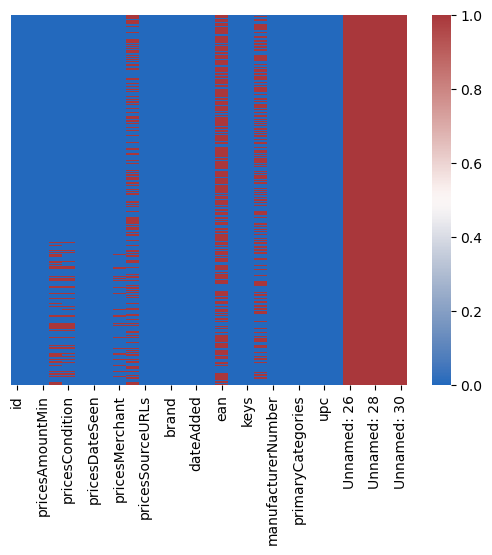

In [14]:
sns.heatmap(data.isnull(), yticklabels=False, cmap="vlag")

In [15]:
data.drop(['Unnamed: 26','Unnamed: 27', 'Unnamed: 28','Unnamed: 29', 'Unnamed: 30'], axis=1, inplace=True)

<Axes: >

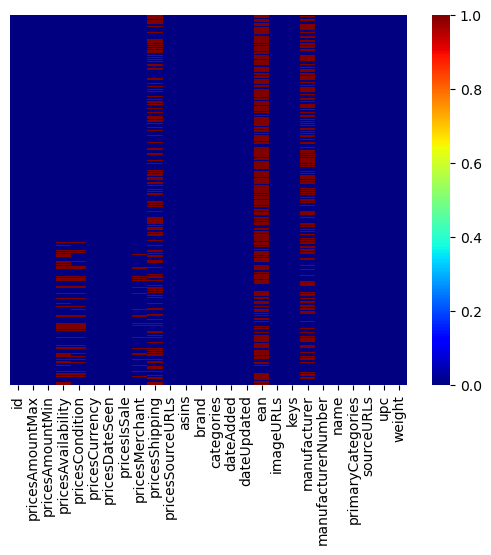

In [16]:
sns.heatmap(data.isnull(), yticklabels=False, cmap='jet')

In [17]:
data.drop(['pricesShipping', 'ean'], axis=1, inplace=True)

<Axes: >

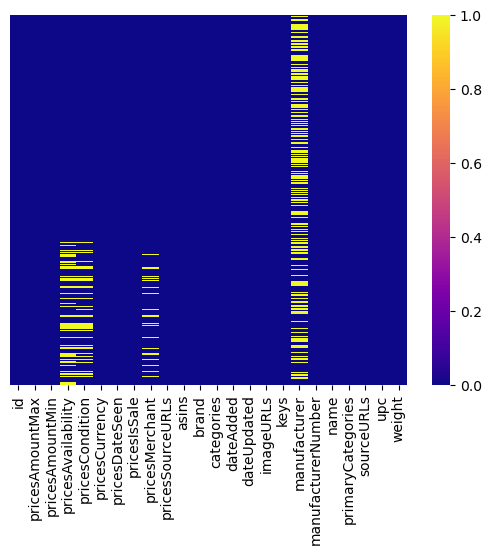

In [18]:
sns.heatmap(data.isnull(), yticklabels=False, cmap='plasma')

In [19]:
data.dropna(subset=['pricesMerchant'], inplace=True)

<Axes: >

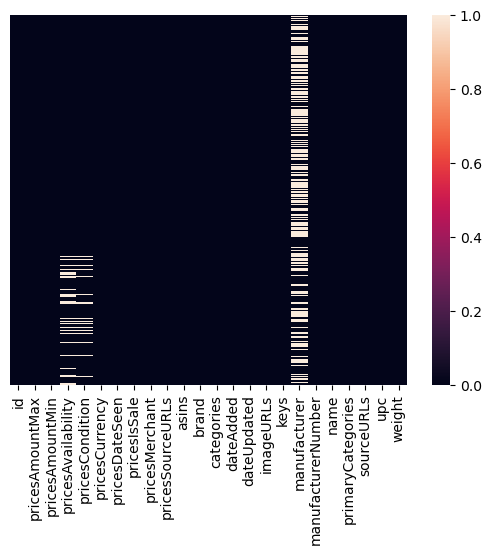

In [20]:
sns.heatmap(data.isnull(), yticklabels=False, cmap='rocket')

In [21]:
data['pricesAvailability'].fillna(method='bfill' , inplace=True)
data['pricesCondition'].fillna(method='ffill' , inplace=True)
data['manufacturer'].fillna(method='bfill' , inplace=True)

<Axes: >

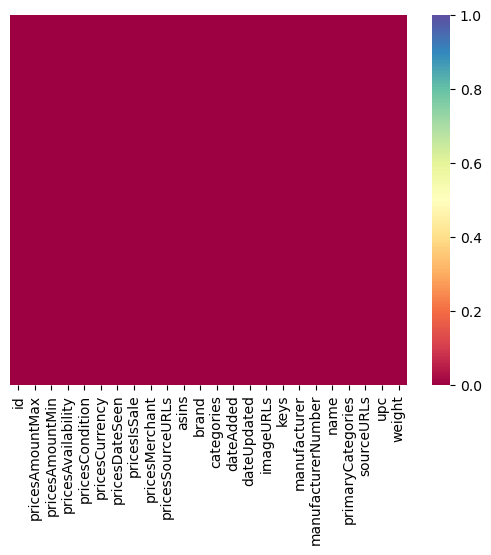

In [22]:
sns.heatmap(data.isnull(), yticklabels=False, cmap="Spectral")

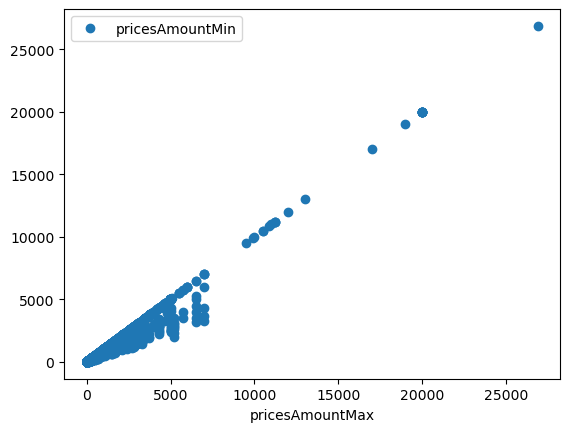

In [23]:
data.plot(x='pricesAmountMax', y='pricesAmountMin', style='o')
plt.show()

Text(0.5, 1.0, 'Starting 5 id in dataset')

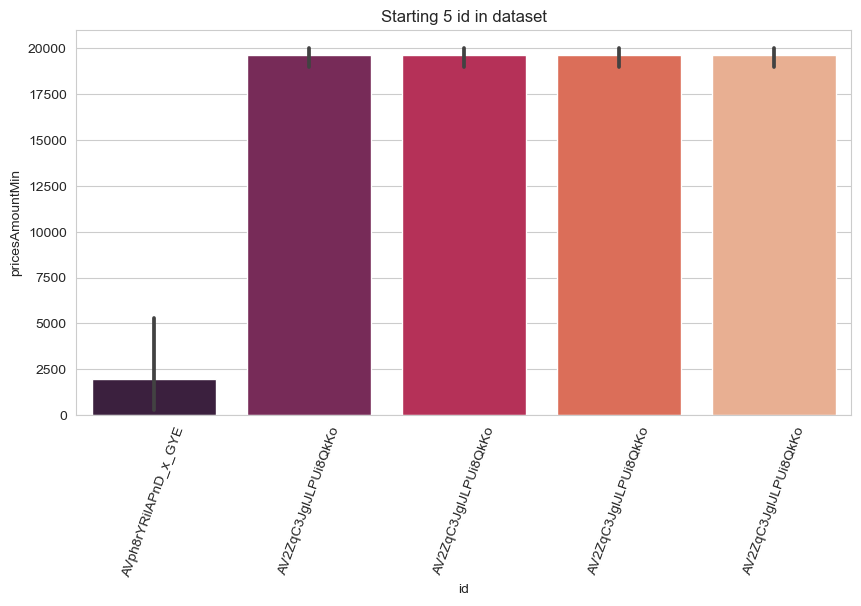

In [24]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.barplot(y='pricesAmountMin', x='id', data=data, order=data.sort_values('pricesAmountMin',ascending=False).id.iloc[:5], palette='rocket')
plt.xticks(rotation=70)
plt.title('Starting 5 id in dataset')

In [25]:
a = data.groupby('pricesAvailability')['pricesAvailability'].count()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '32 available'),
  Text(1, 0, '7 available'),
  Text(2, 0, 'FALSE'),
  Text(3, 0, 'In Stock'),
  Text(4, 0, 'More Coming Soon'),
  Text(5, 0, 'More on the Way'),
  Text(6, 0, 'No'),
  Text(7, 0, 'Out Of Stock'),
  Text(8, 0, 'Retired'),
  Text(9, 0, 'Special Order'),
  Text(10, 0, 'TRUE'),
  Text(11, 0, 'Yes'),
  Text(12, 0, 'sold'),
  Text(13, 0, 'undefined'),
  Text(14, 0, 'yes')])

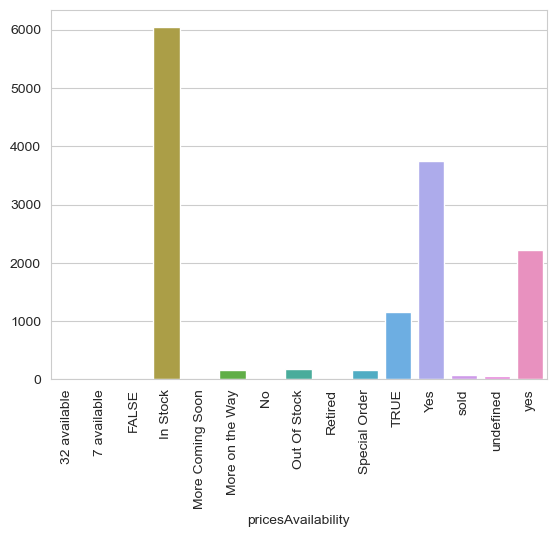

In [26]:
sns.barplot(x=a.index, y=a.values)
plt.xticks(rotation=90)

In [27]:
a = data.groupby('pricesIsSale')['pricesIsSale'].count()

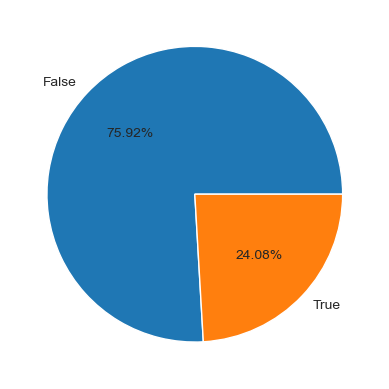

In [28]:
plt.pie(a, labels = a.index, autopct='%.2f%%')
plt.show()

<Axes: xlabel='pricesAmountMax', ylabel='Count'>

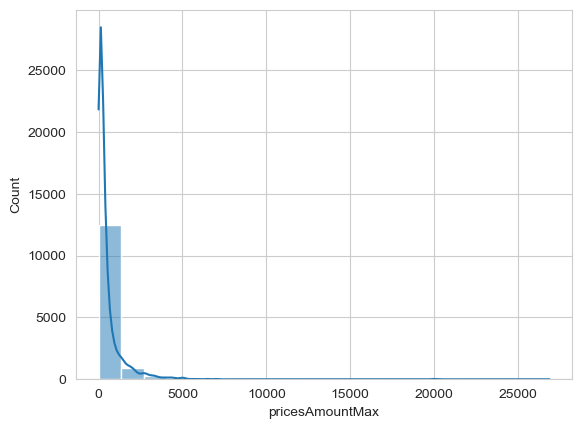

In [29]:
sns.histplot(data['pricesAmountMax'], bins=20, kde=True)

<Axes: xlabel='pricesAmountMax', ylabel='pricesAmountMin'>

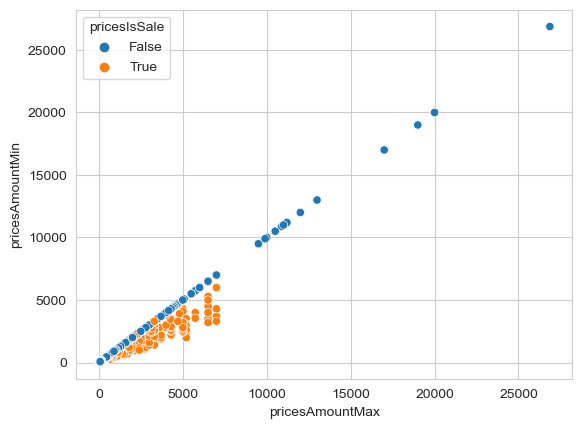

In [30]:
sns.scatterplot(x=data.pricesAmountMax, y=data.pricesAmountMin, hue=data.pricesIsSale)

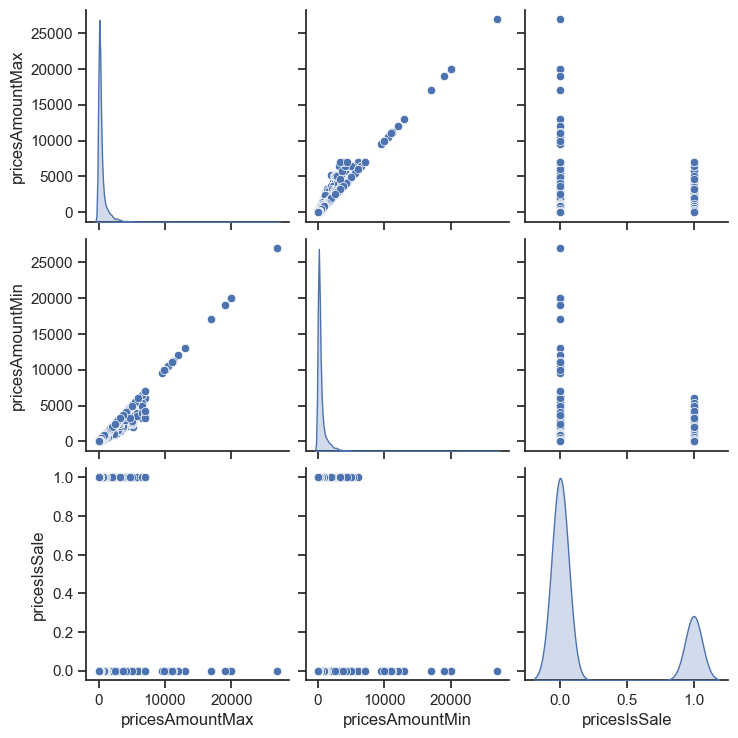

In [31]:
sns.set(style="ticks")
sns.pairplot(data, diag_kind="kde", markers="o")

<Axes: xlabel='pricesAmountMin', ylabel='Density'>

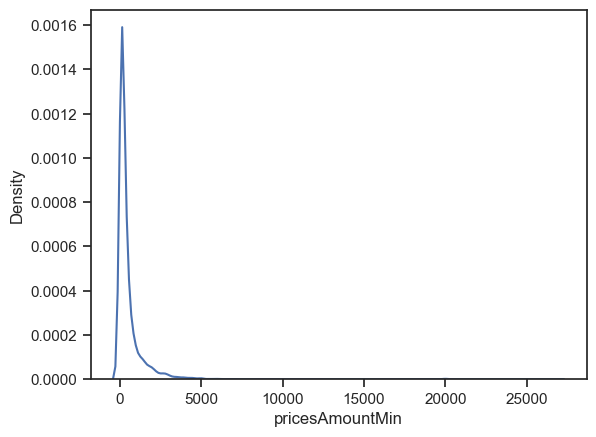

In [32]:
sns.kdeplot(data.pricesAmountMin)

<Axes: xlabel='pricesAmountMax', ylabel='Density'>

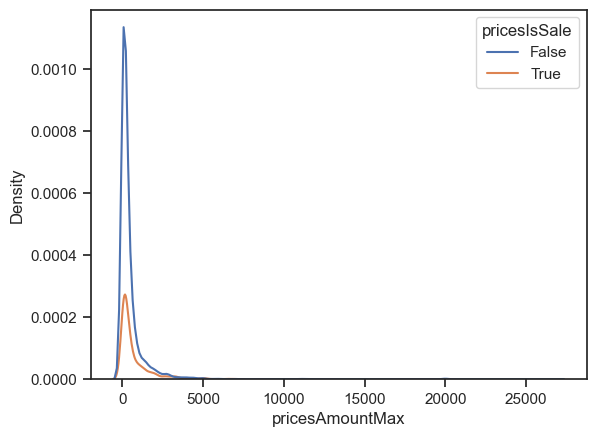

In [33]:
sns.kdeplot(x='pricesAmountMax', hue='pricesIsSale', data=data)

{'whiskers': [<matplotlib.lines.Line2D at 0x214f13fcbd0>,
 'caps': [<matplotlib.lines.Line2D at 0x214f13fdf90>,
 'boxes': [<matplotlib.lines.Line2D at 0x214f13fc350>],
 'medians': [<matplotlib.lines.Line2D at 0x214f13feed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x214f13439d0>],
 'means': []}

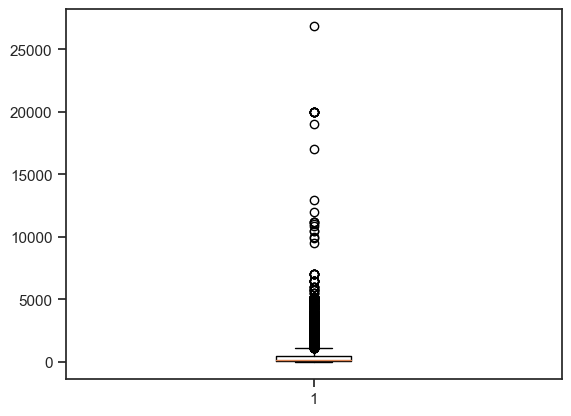

In [34]:
plt.boxplot(data.pricesAmountMax)

<Axes: xlabel='pricesIsSale', ylabel='count'>

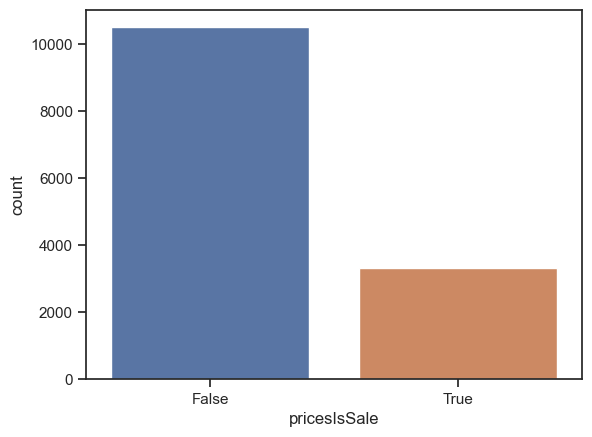

In [35]:
sns.countplot(x="pricesIsSale", data=data)

<Axes: xlabel='pricesAmountMax', ylabel='pricesAmountMin'>

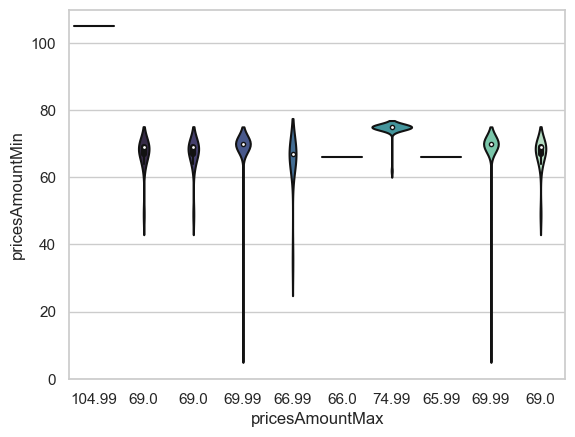

In [36]:
sns.set(style='whitegrid')
sns.violinplot(x='pricesAmountMax', y='pricesAmountMin', data=data, order=data.pricesAmountMax.iloc[:10], palette='mako')

<Axes: xlabel='pricesAmountMin'>

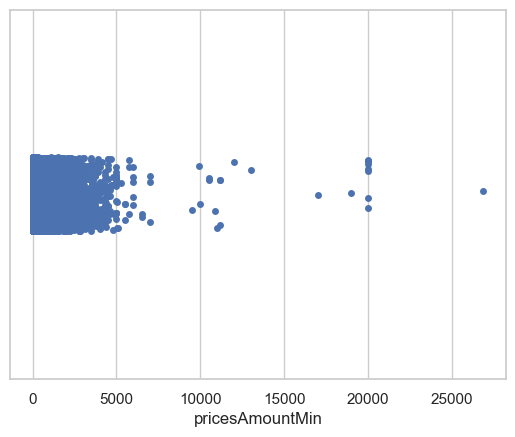

In [37]:
sns.stripplot(data=data, x="pricesAmountMin")

<Axes: xlabel='pricesAmountMax', ylabel='Proportion'>

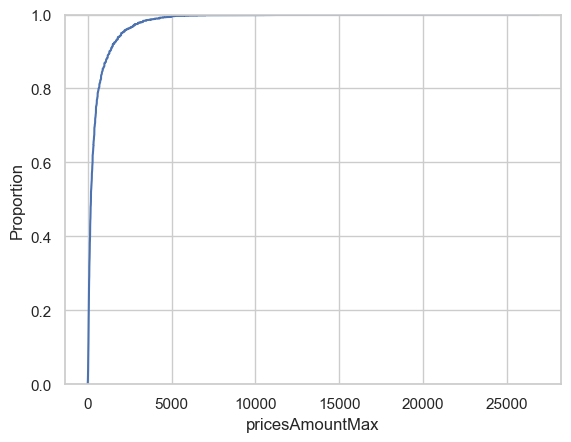

In [39]:
sns.ecdfplot(x='pricesAmountMax', data=data)

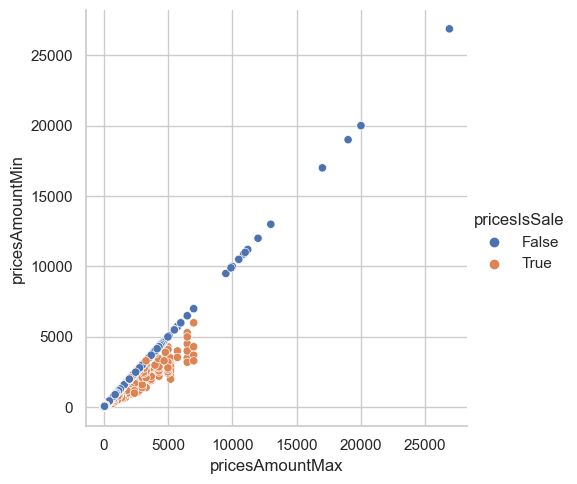

In [40]:
sns.relplot(x='pricesAmountMax', y='pricesAmountMin', hue='pricesIsSale', data=data)

<Axes: xlabel='pricesAmountMax', ylabel='pricesAmountMin'>

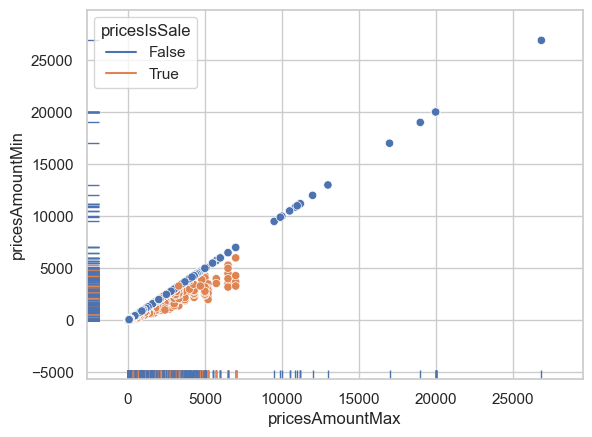

In [41]:
sns.scatterplot(x='pricesAmountMax', y='pricesAmountMin', hue='pricesIsSale', data=data)
sns.rugplot(x='pricesAmountMax', y='pricesAmountMin', hue='pricesIsSale', data=data)

In [44]:
from scipy import stats
z_scores=stats.zscore(data["pricesAmountMin"])
z_score_outliers = (z_scores<-3)|(z_scores>3)

In [45]:
z_score_outlier_rows = data[z_score_outliers]
print("outliers detected by Z-score:",z_score_outlier_rows)

outliers detected by Z-score:                          id  pricesAmountMax  pricesAmountMin  \
1420   AVwvFm-zU2_QcyX9R3FA          3739.99          3739.99   
1421   AVwvFm-zU2_QcyX9R3FA          3959.99          3959.99   
1422   AVwvFm-zU2_QcyX9R3FA          4399.99          4399.99   
1423   AVwvFm-zU2_QcyX9R3FA          4199.99          4199.99   
1424   AVwvFm-zU2_QcyX9R3FA          4399.99          4399.99   
...                     ...              ...              ...   
13599  AVpflKqwLJeJML43_2MI          4997.00          4997.00   
13600  AVpflKqwLJeJML43_2MI          6999.99          6999.99   
13601  AVpflKqwLJeJML43_2MI          4159.97          4159.97   
13602  AVpflKqwLJeJML43_2MI          6999.99          4296.99   
13656  AV1YHofAGV-KLJ3addLV          3697.99          3697.99   

      pricesAvailability pricesCondition pricesCurrency  \
1420                 Yes             New            USD   
1421                 Yes             New            USD   
1422        

In [47]:
data.shape

(13820, 24)

In [49]:
x = (z_scores>-3)&(z_scores<3)

In [51]:
new_df = data[x]

In [52]:
new_df

,id,pricesAmountMax,pricesAmountMin,pricesAvailability,pricesCondition,pricesCurrency,pricesDateSeen,pricesIsSale,pricesMerchant,pricesSourceURLs,...,dateUpdated,imageURLs,keys,manufacturer,manufacturerNumber,name,primaryCategories,sourceURLs,upc,weight
0,AVphzgbJLJeJML43fA0o,104.99,104.99,Yes,New,USD,"2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...",False,Bestbuy.com,http://www.bestbuy.com/site/sanus-tv-wall-moun...,...,2018-05-12T18:59:48Z,https://images-na.ssl-images-amazon.com/images...,sanusvlf410b110inchsuperslimfullmotionmountfor...,Boytone,VLF410B1,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,https://www.amazon.com/Sanus-VLF410B1-10-Inch-...,7.94E+11,32.8 pounds
1,AVpgMuGwLJeJML43KY_c,69.00,64.99,In Stock,New,USD,2017-12-14T06:00:00Z,True,Walmart.com,https://www.walmart.com/ip/BOYTONE-BT210FB-BLA...,...,2018-06-13T19:39:02Z,https://images-na.ssl-images-amazon.com/images...,boytone2500w21chhometheatersystemblackdiamond/...,Boytone,BT-210F,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds
2,AVpgMuGwLJeJML43KY_c,69.00,69.00,In Stock,New,USD,2017-09-08T05:00:00Z,False,Walmart.com,https://www.walmart.com/ip/Boytone-BT-210F-Blu...,...,2018-06-13T19:39:02Z,https://images-na.ssl-images-amazon.com/images...,boytone2500w21chhometheatersystemblackdiamond/...,Boytone,BT-210F,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds
3,AVpgMuGwLJeJML43KY_c,69.99,69.99,Yes,New,USD,2017-10-10T05:00:00Z,False,Bestbuy.com,https://www.bestbuy.com/site/boytone-2500w-2-1...,...,2018-06-13T19:39:02Z,https://images-na.ssl-images-amazon.com/images...,boytone2500w21chhometheatersystemblackdiamond/...,Boytone,BT-210F,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds
4,AVpgMuGwLJeJML43KY_c,66.99,66.99,Yes,New,USD,2017-08-28T07:00:00Z,False,Bestbuy.com,https://www.bestbuy.com/site/boytone-2500w-2-1...,...,2018-06-13T19:39:02Z,https://images-na.ssl-images-amazon.com/images...,boytone2500w21chhometheatersystemblackdiamond/...,Boytone,BT-210F,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14585,AVpgibRDLJeJML43PTZX,69.55,69.55,In Stock,new,USD,2015-10-18T00:00:00Z,False,Beach Audio Inc - Walmart.com,http://www.walmart.com/ip/Naxa-NHS-7008-Blueto...,...,2018-06-13T19:43:55Z,http://pisces.bbystatic.com/image2/BestBuy_US/...,naxa42soundbarwithbluetooth_builtinsubwoofer/0...,Naxa,SPNA7008,naxa - 2.1-Channel Soundbar with 50-Watt Digit...,Electronics,https://www.walmart.com/reviews/product/441840...,8.40E+11,4.1 pounds
14586,AVpgibRDLJeJML43PTZX,58.99,58.99,In Stock,New,USD,2017-12-14T06:00:00Z,False,Walmart.com,https://www.walmart.com/ip/Naxa-42-Sound-bar-w...,...,2018-06-13T19:43:55Z,http://pisces.bbystatic.com/image2/BestBuy_US/...,naxa42soundbarwithbluetooth_builtinsubwoofer/0...,Naxa,SPNA7008,naxa - 2.1-Channel Soundbar with 50-Watt Digit...,Electronics,https://www.walmart.com/reviews/product/441840...,8.40E+11,4.1 pounds
14588,AVpgibRDLJeJML43PTZX,58.99,58.99,Yes,New,USD,"2017-10-10T19:00:00Z,2017-09-06T17:00:00Z,2017...",False,Bestbuy.com,https://www.bestbuy.com/site/naxa-2-1-channel-...,...,2018-06-13T19:43:55Z,http://pisces.bbystatic.com/image2/BestBuy_US/...,naxa42soundbarwithbluetooth_builtinsubwoofer/0...,Naxa,SPNA7008,naxa - 2.1-Channel Soundbar with 50-Watt Digit...,Electronics,https://www.walmart.com/reviews/product/441840...,8.40E+11,4.1 pounds
14589,AVpgibRDLJeJML43PTZX,58.49,58.49,In Stock,New,USD,2018-03-05T11:00:00Z,False,Walmart.com,https://www.walmart.com/ip/NAXA-42-Sound-Bar-w...,...,2018-06-13T19:43:55Z,http://pisces.bbystatic.com/image2/BestBuy_US/...,naxa42soundbarwithbluetooth_builtinsubwoofer/0...,Naxa,SPNA70

In [53]:
new_df.head(1)

,id,pricesAmountMax,pricesAmountMin,pricesAvailability,pricesCondition,pricesCurrency,pricesDateSeen,pricesIsSale,pricesMerchant,pricesSourceURLs,...,dateUpdated,imageURLs,keys,manufacturer,manufacturerNumber,name,primaryCategories,sourceURLs,upc,weight
0,AVphzgbJLJeJML43fA0o,104.99,104.99,Yes,New,USD,"2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...",False,Bestbuy.com,http://www.bestbuy.com/site/sanus-tv-wall-moun...,...,2018-05-12T18:59:48Z,https://images-na.ssl-images-amazon.com/images...,sanusvlf410b110inchsuperslimfullmotionmountfor...,Boytone,VLF410B1,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,https://www.amazon.com/Sanus-VLF410B1-10-Inch-...,7.94E+11,32.8 pounds


In [54]:
z_scores = stats.zscore(new_df["pricesAmountMax"])
z_score_outlier = (z_scores<-3)|(z_scores>3)

In [55]:
z_score_outlier_row=new_df[z_score_outlier]
print("outliers detected by Z-score:",z_score_outlier_row)

outliers detected by Z-score:                          id  pricesAmountMax  pricesAmountMin  \
980    AVzSv0OV-jtxr-f3yibR          2496.99          2496.99   
987    AVzSv0OV-jtxr-f3yibR          2496.99          2496.99   
988    AVzSv0OV-jtxr-f3yibR          2696.99          2696.99   
990    AVzSv0OV-jtxr-f3yibR          2697.00          2697.00   
994    AVzSv0OV-jtxr-f3yibR          2696.99          2696.99   
...                     ...              ...              ...   
13580  AVpflKqwLJeJML43_2MI          6999.99          3299.00   
13582  AVpflKqwLJeJML43_2MI          2799.00          2799.00   
13654  AV1YHofAGV-KLJ3addLV          4699.99          3297.99   
13658  AV1YHofAGV-KLJ3addLV          3297.99          3297.99   
13660  AV1YHofAGV-KLJ3addLV          2495.00          2495.00   

      pricesAvailability          pricesCondition pricesCurrency  \
980                  yes                      New            USD   
987                  yes                      New    

In [57]:
p=(z_scores>-3)&(z_scores<3)
df_new=new_df[p]

In [58]:
df_new

,id,pricesAmountMax,pricesAmountMin,pricesAvailability,pricesCondition,pricesCurrency,pricesDateSeen,pricesIsSale,pricesMerchant,pricesSourceURLs,...,dateUpdated,imageURLs,keys,manufacturer,manufacturerNumber,name,primaryCategories,sourceURLs,upc,weight
0,AVphzgbJLJeJML43fA0o,104.99,104.99,Yes,New,USD,"2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...",False,Bestbuy.com,http://www.bestbuy.com/site/sanus-tv-wall-moun...,...,2018-05-12T18:59:48Z,https://images-na.ssl-images-amazon.com/images...,sanusvlf410b110inchsuperslimfullmotionmountfor...,Boytone,VLF410B1,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,https://www.amazon.com/Sanus-VLF410B1-10-Inch-...,7.94E+11,32.8 pounds
1,AVpgMuGwLJeJML43KY_c,69.00,64.99,In Stock,New,USD,2017-12-14T06:00:00Z,True,Walmart.com,https://www.walmart.com/ip/BOYTONE-BT210FB-BLA...,...,2018-06-13T19:39:02Z,https://images-na.ssl-images-amazon.com/images...,boytone2500w21chhometheatersystemblackdiamond/...,Boytone,BT-210F,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds
2,AVpgMuGwLJeJML43KY_c,69.00,69.00,In Stock,New,USD,2017-09-08T05:00:00Z,False,Walmart.com,https://www.walmart.com/ip/Boytone-BT-210F-Blu...,...,2018-06-13T19:39:02Z,https://images-na.ssl-images-amazon.com/images...,boytone2500w21chhometheatersystemblackdiamond/...,Boytone,BT-210F,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds
3,AVpgMuGwLJeJML43KY_c,69.99,69.99,Yes,New,USD,2017-10-10T05:00:00Z,False,Bestbuy.com,https://www.bestbuy.com/site/boytone-2500w-2-1...,...,2018-06-13T19:39:02Z,https://images-na.ssl-images-amazon.com/images...,boytone2500w21chhometheatersystemblackdiamond/...,Boytone,BT-210F,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds
4,AVpgMuGwLJeJML43KY_c,66.99,66.99,Yes,New,USD,2017-08-28T07:00:00Z,False,Bestbuy.com,https://www.bestbuy.com/site/boytone-2500w-2-1...,...,2018-06-13T19:39:02Z,https://images-na.ssl-images-amazon.com/images...,boytone2500w21chhometheatersystemblackdiamond/...,Boytone,BT-210F,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14585,AVpgibRDLJeJML43PTZX,69.55,69.55,In Stock,new,USD,2015-10-18T00:00:00Z,False,Beach Audio Inc - Walmart.com,http://www.walmart.com/ip/Naxa-NHS-7008-Blueto...,...,2018-06-13T19:43:55Z,http://pisces.bbystatic.com/image2/BestBuy_US/...,naxa42soundbarwithbluetooth_builtinsubwoofer/0...,Naxa,SPNA7008,naxa - 2.1-Channel Soundbar with 50-Watt Digit...,Electronics,https://www.walmart.com/reviews/product/441840...,8.40E+11,4.1 pounds
14586,AVpgibRDLJeJML43PTZX,58.99,58.99,In Stock,New,USD,2017-12-14T06:00:00Z,False,Walmart.com,https://www.walmart.com/ip/Naxa-42-Sound-bar-w...,...,2018-06-13T19:43:55Z,http://pisces.bbystatic.com/image2/BestBuy_US/...,naxa42soundbarwithbluetooth_builtinsubwoofer/0...,Naxa,SPNA7008,naxa - 2.1-Channel Soundbar with 50-Watt Digit...,Electronics,https://www.walmart.com/reviews/product/441840...,8.40E+11,4.1 pounds
14588,AVpgibRDLJeJML43PTZX,58.99,58.99,Yes,New,USD,"2017-10-10T19:00:00Z,2017-09-06T17:00:00Z,2017...",False,Bestbuy.com,https://www.bestbuy.com/site/naxa-2-1-channel-...,...,2018-06-13T19:43:55Z,http://pisces.bbystatic.com/image2/BestBuy_US/...,naxa42soundbarwithbluetooth_builtinsubwoofer/0...,Naxa,SPNA7008,naxa - 2.1-Channel Soundbar with 50-Watt Digit...,Electronics,https://www.walmart.com/reviews/product/441840...,8.40E+11,4.1 pounds
14589,AVpgibRDLJeJML43PTZX,58.49,58.49,In Stock,New,USD,2018-03-05T11:00:00Z,False,Walmart.com,https://www.walmart.com/ip/NAXA-42-Sound-Bar-w...,...,2018-06-13T19:43:55Z,http://pisces.bbystatic.com/image2/BestBuy_US/...,naxa42soundbarwithbluetooth_builtinsubwoofer/0...,Naxa,SPNA70

In [59]:
#Data Preproceessing

## Assuming features like 'pricesAmountMax', 'pricesAmountMin', 'pricesMerchant', 'brand', 'manufacturer', 'weight'
X = data[['pricesAmountMax', 'pricesAmountMin', 'pricesMerchant', 'brand', 'manufacturer', 'weight']]

Y = data['pricesAmountMax']  # Predicting the 'pricesAmountMax'

In [60]:
# Convert categorical variables into numerical format (one-hot encoding)
X = pd.get_dummies(X, columns=['pricesMerchant', 'brand', 'manufacturer', 'weight'])

In [61]:
#Spliting the data into Training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [62]:
#Creating Linear Regression model 
model = LinearRegression()

In [63]:
#Training the model
model.fit(X_train, Y_train)

LinearRegression()

In [64]:
# Making predictions on the test set
Y_pred = model.predict(X_test)

In [65]:
#Model Evaluation

mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

In [67]:
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse)
print("Root Mean Squared Error : ", rmse)
print("R2 Score : ", r2)

Mean Absolute Error :  1.0856070279863421e-06
Mean Squared Error :  4.4347251500745827e-11
Root Mean Squared Error :  6.659373206296958e-06
R2 Score :  1.0


In [71]:
Y_mean = np.mean(Y_test)
SSR = np.sum((Y_pred - Y_mean) ** 2)
SSR

5352099190.322838

In [72]:
SST = np.sum((Y_test - Y_mean) ** 2)
SST

5352099190.597584

In [73]:
SSE = SST-SSR
SSE

0.2747459411621094

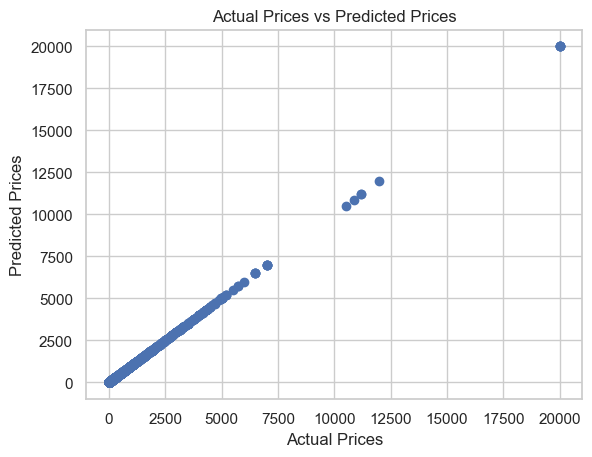

In [49]:
#Visualizing the Result

plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [50]:
# Interpreting the model coefficients 
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

                                                Feature   Coefficient
0                                       pricesAmountMax  1.000000e+00
1                                       pricesAmountMin -1.409233e-15
2               pricesMerchant_$aveTronix - Walmart.com  1.880245e-06
3                          pricesMerchant_1 SHOP DIRECT  1.880246e-06
4        pricesMerchant_1 Stop Electronics Center, Inc.  1.880246e-06
...                                                 ...           ...
2936                                   weight_91 pounds  1.077659e-05
2937                                 weight_92.6 pounds  1.077659e-05
2938                                     weight_97.0 lb -1.717223e-05
2939                                 weight_Electronics  1.077659e-05
2940  weight_http://www.walmart.com/ip/Kenwood-DDX97...  1.077659e-05

[2941 rows x 2 columns]


In [51]:
#Tuning the model

lr_model = LinearRegression()
lr_scores = cross_val_score(lr_model, X_train, Y_train, cv=5)

In [52]:
lr_model.fit(X_train, Y_train)

LinearRegression()

In [53]:
lr_pred = lr_model.predict(X_test)

In [54]:
lr_mae = mean_absolute_error(Y_test, lr_pred)
lr_mse = mean_squared_error(Y_test, lr_pred)
lr_r2 = r2_score(Y_test, lr_pred)

In [55]:
print('Linear MAE : ', lr_mae)
print('Linear MSE : ', lr_mse)
print('Linear R2 : ', lr_r2)

Linear MAE :  1.0856070279863421e-06
Linear MSE :  4.4347251500745827e-11
Linear R2 :  1.0


In [56]:
ridge_model = Ridge(alpha=1.0)
ridge_scores = cross_val_score(ridge_model, X_train, Y_train, cv=5)

In [57]:
ridge_model.fit(X_train, Y_train)
ridge_pred = ridge_model.predict(X_test)
ridge_mae = mean_absolute_error(Y_test, ridge_pred)
ridge_mse = mean_squared_error(Y_test, ridge_pred)
ridge_r2 = r2_score(Y_test, ridge_pred)

In [58]:
print('Ridge MAE : ', ridge_mae)
print('Ridge MSE : ', ridge_mse)
print('Ridge R2 : ', ridge_r2)

Ridge MAE :  3.286578487048607e-07
Ridge MSE :  1.1133960929267243e-12
Ridge R2 :  1.0


In [59]:
lasso_model = Lasso(alpha=1.0)
lasso_scores = cross_val_score(lasso_model, X_train, Y_train, cv=5)

In [60]:
lasso_model.fit(X_train, Y_train)
lasso_pred = lasso_model.predict(X_test)
lasso_mae = mean_absolute_error(Y_test, lasso_pred)
lasso_mse = mean_squared_error(Y_test, lasso_pred)
lasso_r2 = r2_score(Y_test, lasso_pred)

In [61]:
print('Lasso MAE : ', lasso_mae)
print('Lasso MSE : ', lasso_mse)
print('Lasso R2 : ', lasso_r2)

Lasso MAE :  0.0006084756645148457
Lasso MSE :  1.6557189340564435e-06
Lasso R2 :  0.9999999999987174


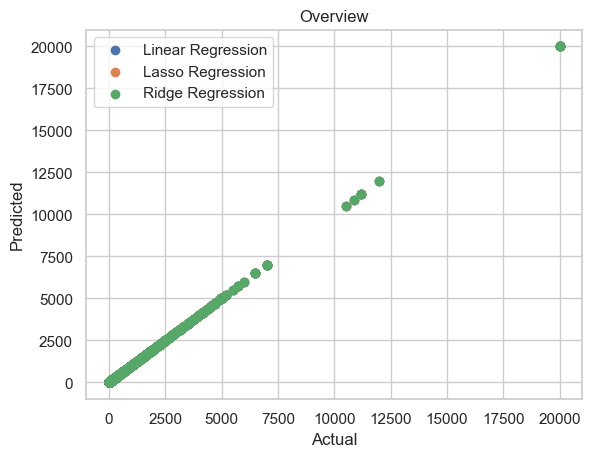

In [62]:
#Plot for all
plt.scatter(Y_test, lr_pred, alpha=1.0, label='Linear Regression')
plt.scatter(Y_test, lasso_pred, alpha=1.0, label='Lasso Regression')
plt.scatter(Y_test, ridge_pred, alpha=1.0, label='Ridge Regression')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Overview')
plt.legend()

In [73]:
#Robust Techniques

from sklearn.linear_model import HuberRegressor, RANSACRegressor

In [66]:
#Huber Regressor
huber = HuberRegressor()

In [67]:
huber.fit(X_train, Y_train)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


HuberRegressor()

In [68]:
huber_pred = huber.predict(X_test)

In [69]:
huber_mae = mean_absolute_error(Y_test, huber_pred)
huber_mse = mean_squared_error(Y_test, huber_pred)
huber_r2 = r2_score(Y_test, huber_pred)

In [70]:
print('Huber MAE : ', huber_mae)
print('Huber MSE : ', huber_mse)
print('Huber R2 Score : ', huber_r2)

Huber MAE :  0.0007373727052199352
Huber MSE :  7.312127248813983e-07
Huber R2 Score :  0.9999999999994336


In [74]:
#RANSAC Regressor
ransac = RANSACRegressor(base_estimator=LinearRegression(),min_samples=50, max_trials=100, random_state=42,residual_threshold=10)

In [75]:
ransac.fit(X_train, Y_train)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_ransac.py:343: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.1 and will be removed in 1.3.
  warnings.warn(


RANSACRegressor(base_estimator=LinearRegression(), estimator=LinearRegression(),
                min_samples=50, random_state=42, residual_threshold=10)

In [76]:
ransac_pred = ransac.predict(X_test)

In [77]:
ransac_mae = mean_absolute_error(Y_test, ransac_pred)
ransac_mse = mean_squared_error(Y_test, ransac_pred)
ransac_r2 = r2_score(Y_test, ransac_pred)

In [78]:
print('Ransac MAE : ', ransac_mae)
print('Ransac MSE : ', ransac_mse)
print('Ransac R2 Score : ', ransac_r2)

Ransac MAE :  7.208650110345426e-11
Ransac MSE :  5.196546997330005e-21
Ransac R2 Score :  1.0


In [79]:
from sklearn.metrics import make_scorer, mean_squared_error, f1_score
from sklearn.model_selection import cross_val_score

# Define a custom scoring function for neg_mean_squared_error
def custom_neg_mean_squared_error(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return -mse

In [80]:
# Creating custom scoring objects
neg_mse_scorer = make_scorer(custom_neg_mean_squared_error)

In [82]:
# Now we can use these custom scoring methods in model evaluation or hyperparameter tuning
# Example with cross-validation
mse_scores = cross_val_score(model, X, Y, cv=5, scoring=neg_mse_scorer)

In [83]:
print("Custom neg_mean_squared_error scores:", mse_scores)

Custom neg_mean_squared_error scores: [-3.44241385e-10 -3.27009335e-25 -3.44203028e-26 -6.54119208e-09
 -2.19170250e-10]
